# IMPORTING LIBRARIES

In [6]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

# READING THE DATASET

In [7]:
df=pd.read_csv("churn_prediction.csv")
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [8]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

# TREATING MISSING VALUES

In [9]:
temp=pd.DataFrame(index=df.columns)
temp["Data Types"]=df.dtypes
temp["Null Count"]=df.isnull().sum()
temp["Unique Count"]=df.nunique()

In [10]:
temp

,Data Types,Null Count,Unique Count
customer_id,int64,0,28382
vintage,int64,0,5473
age,int64,0,90
gender,object,525,2
dependents,float64,2463,15
occupation,object,80,5
city,float64,803,1604
customer_nw_category,int64,0,3
branch_code,int64,0,3185
days_since_last_transaction,float64,3223,360


TREATING GENDER (FILLING WITH MODE)

In [11]:
df["gender"].fillna(df["gender"].mode()[0],inplace=True)

TREATING DEPENDENTS (FILLING WITH MODE)

In [12]:
df["dependents"].fillna(df["dependents"].mode()[0],inplace=True)

TREATING OCCUPATION (FILLING WITH MODE)

In [13]:
df["occupation"].fillna(df["occupation"].mode()[0],inplace=True)

TREATING CITY (FILLING WITH MODE)

In [14]:
df["city"].fillna(df["city"].mode()[0],inplace=True)

TREATING DAYS_SINCE_LAST_TRANSACTION 

In [15]:
df["days_since_last_transaction"].fillna(450,inplace=True)

In [16]:
df.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

# TREATING OUTLIERS

In [17]:
df.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2364.336446,48.208336,0.317102,802.444014,2.225530,925.975019,113.150060,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,0.958386,428.316238,0.660443,937.799129,145.411655,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,0.000000,409.000000,2.000000,176.000000,13.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,0.000000,879.000000,2.000000,572.000000,41.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,154.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,12899.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,450.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


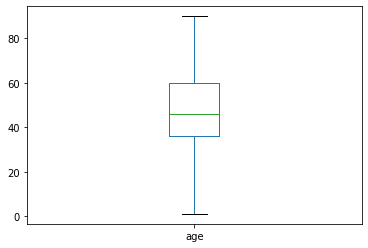

In [18]:
df["age"].plot.box()

In [19]:
df["dependents"].value_counts()

0.0     23898
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
36.0        1
52.0        1
25.0        1
9.0         1
50.0        1
32.0        1
8.0         1
Name: dependents, dtype: int64

In [20]:
df.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [21]:
df.shape

(28382, 21)

In [22]:
df.tail(10)

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
28372,30292,2161,49,Male,1.0,self_employed,1320.0,3,1347,25.0,...,10535.24,2145.22,5827.11,286.33,10686.33,10609.46,609.46,2046.76,3843.40,1
28373,30293,2384,73,Male,0.0,retired,1381.0,3,790,3.0,...,1926.57,1491.87,1973.16,2514.47,433.49,1039.76,180.37,1410.80,1800.70,0
28374,30294,658,55,Male,0.0,salaried,1076.0,3,463,306.0,...,7713.88,7713.88,7670.06,0.33,0.33,0.33,0.33,7713.88,7713.88,1
28375,30295,2041,42,Male,0.0,self_employed,146.0,2,286,57.0,...,6777.41,8082.48,3515.03,0.51,90.10,1103.20,1183.04,7956.03,7431.36,0
28376,30296,2155,85,Male,0.0,retired,1589.0,2,389,450.0,...,1741.50,1741.50,1730.46,0.04,0.04,0.04,0.04,1741.50,1741.50,0
28377,30297,1845,10,Female,0.0,student,1020.0,2,1207,70.0,...,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
28378,30298,4919,34,Female,0.0,self_employed,1046.0,2,223,14.0,...,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
28379,30299,297,47,Male,0.0,salaried,1096.0,2,588,0.0,...,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1
28380,30300,2585,50,Male,3.0,self_employed,1219.0,3,274,450.0,...,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0
28381,30301,2349,18,Male,0.0,student,1232.0,2,474,59.0,...,2821.34,3213.44,4447.45,0.11,7.44,714.40,1094.09,2402.62,3260.58,1


In [23]:
df.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2364.336446,48.208336,0.317102,802.444014,2.225530,925.975019,113.150060,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,0.958386,428.316238,0.660443,937.799129,145.411655,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,0.000000,409.000000,2.000000,176.000000,13.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,0.000000,879.000000,2.000000,572.000000,41.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,154.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,12899.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,450.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


In [24]:
df["city"].value_counts()

1020.0    4282
1096.0    2016
409.0     1334
146.0     1291
834.0     1138
          ... 
629.0        1
527.0        1
1212.0       1
530.0        1
70.0         1
Name: city, Length: 1604, dtype: int64

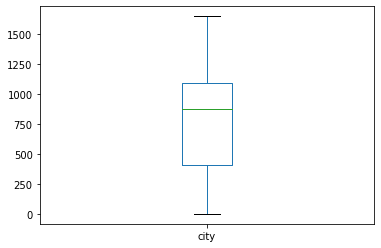

In [25]:
df["city"].plot.box()

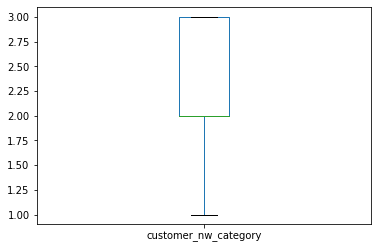

In [26]:
df["customer_nw_category"].plot.box()

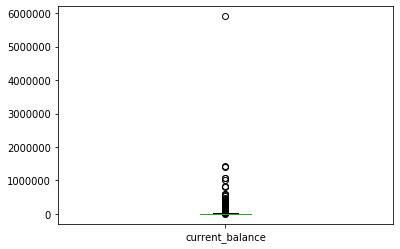

In [27]:
df["current_balance"].plot.box()

# CHANGING DATATYPES AND CLEANING THE DATASET

In [28]:
df=df.astype({"occupation":"object"})

In [29]:
df=pd.get_dummies(df)

In [30]:
df.head()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,...,current_month_balance,previous_month_balance,churn,gender_Female,gender_Male,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,1,3135,66,0.0,187.0,2,755,224.0,1458.71,1458.71,...,1458.71,1458.71,0,0,1,0,0,0,1,0
1,2,310,35,0.0,1020.0,2,3214,60.0,5390.37,8704.66,...,6496.78,8787.61,0,0,1,0,0,0,1,0
2,4,2356,31,0.0,146.0,2,41,450.0,3913.16,5815.29,...,5006.28,5070.14,0,0,1,0,0,1,0,0
3,5,478,90,0.0,1020.0,2,582,147.0,2291.91,2291.91,...,2291.91,1669.79,1,0,1,0,0,0,1,0
4,6,2531,42,2.0,1494.0,3,388,58.0,927.72,1401.72,...,1157.15,1677.16,1,0,1,0,0,0,1,0


In [31]:
df.columns

Index(['customer_id', 'vintage', 'age', 'dependents', 'city',
       'customer_nw_category', 'branch_code', 'days_since_last_transaction',
       'current_balance', 'previous_month_end_balance',
       'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2',
       'current_month_credit', 'previous_month_credit', 'current_month_debit',
       'previous_month_debit', 'current_month_balance',
       'previous_month_balance', 'churn', 'gender_Female', 'gender_Male',
       'occupation_company', 'occupation_retired', 'occupation_salaried',
       'occupation_self_employed', 'occupation_student'],
      dtype='object')

OBSERVING OUTLIERS IN THE MUNERICAL DATASET

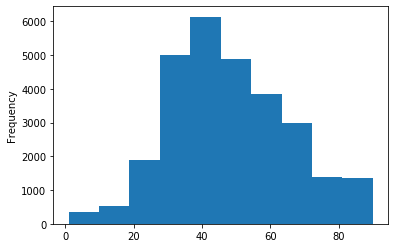

In [32]:
cols=["age","dependents","city","customer_nw_category","current_balance","previous_month_end_balance",
      "average_monthly_balance_prevQ2","average_monthly_balance_prevQ","current_month_credit","previous_month_credit",
      "current_month_debit","previous_month_debit","current_month_balance","previous_month_balance"]
df[cols[0]].plot.hist()

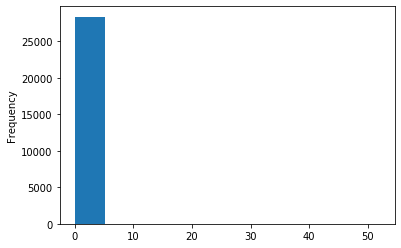

In [33]:
df[cols[1]].plot.hist()

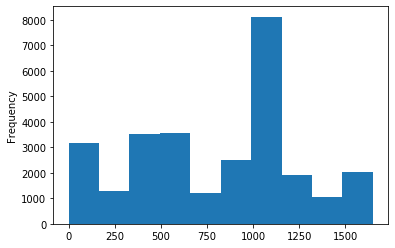

In [34]:
df[cols[2]].plot.hist()

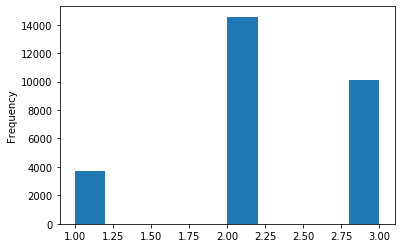

In [35]:
df[cols[3]].plot.hist()

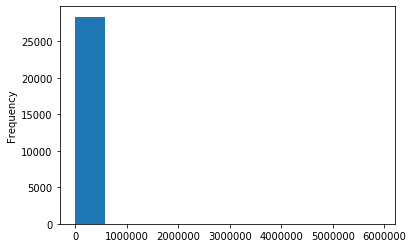

In [36]:
df[cols[4]].plot.hist()

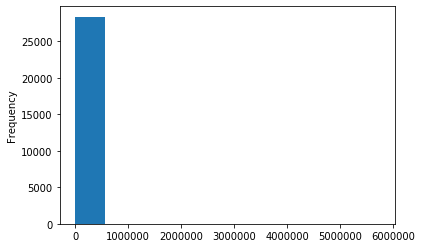

In [37]:
df[cols[5]].plot.hist()

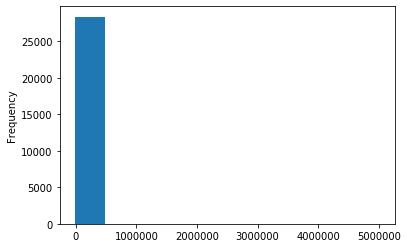

In [38]:
df[cols[6]].plot.hist()

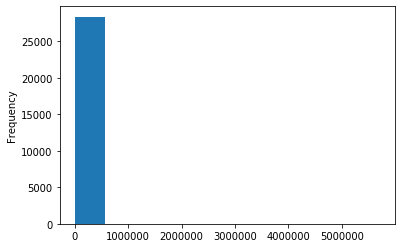

In [39]:
df[cols[7]].plot.hist()

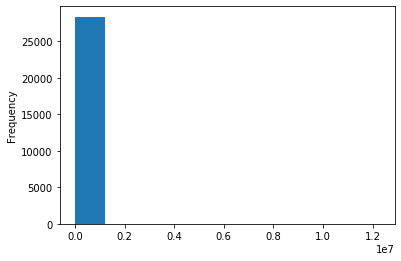

In [40]:
df[cols[8]].plot.hist()

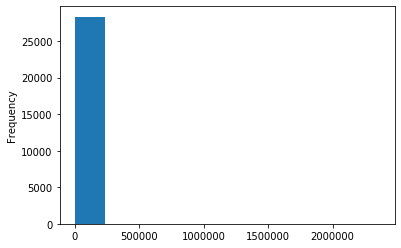

In [41]:
df[cols[9]].plot.hist()

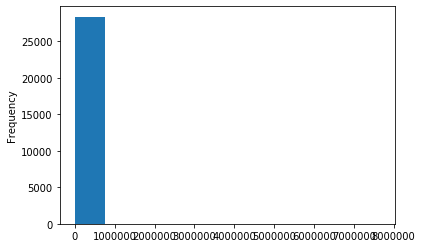

In [42]:
df[cols[10]].plot.hist()

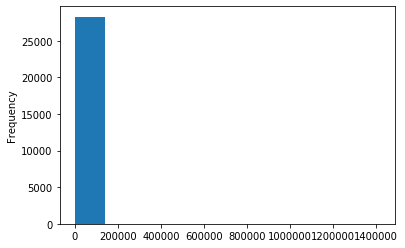

In [43]:
df[cols[11]].plot.hist()

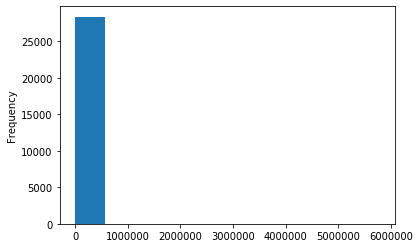

In [44]:
df[cols[12]].plot.hist()

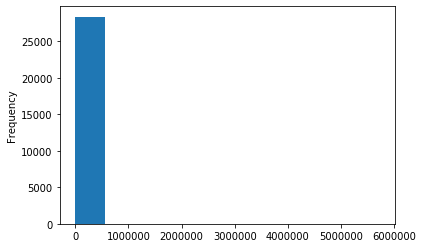

In [45]:
df[cols[13]].plot.hist()

AS WE OBSERVE IN THE ABOVE PLOTS,EXCEPT AGE AND CITY ALL OTHER NUMERICAL VALUES HAVE TO BE TRANSFORMED.SO USING LOG TRANSFORMAATION FOR THE FOLLOWING:

In [46]:
cols= ["dependents","customer_nw_category", "current_balance","previous_month_end_balance","average_monthly_balance_prevQ2",
       "average_monthly_balance_prevQ","current_month_credit","previous_month_credit","current_month_debit",
       "previous_month_debit","current_month_balance","previous_month_balance"]
for i in cols:
    df[i]=np.log(df[i]+50000)

In [47]:
df.head()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,...,current_month_balance,previous_month_balance,churn,gender_Female,gender_Male,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,1,3135,66,10.819778,187.0,10.819818,755,224.0,10.848535,10.848535,...,10.848535,10.848535,0,0,1,0,0,0,1,0
1,2,310,35,10.819778,1020.0,10.819818,3214,60.0,10.922161,10.980274,...,10.941939,10.981686,0,0,1,0,0,0,1,0
2,4,2356,31,10.819778,146.0,10.819818,41,450.0,10.895130,10.929803,...,10.915203,10.916363,0,0,1,0,0,1,0,0
3,5,478,90,10.819778,1020.0,10.819818,582,147.0,10.864597,10.864597,...,10.864597,10.852629,1,0,1,0,0,0,1,0
4,6,2531,42,10.819818,1494.0,10.819838,388,58.0,10.838163,10.847427,...,10.842658,10.852771,1,0,1,0,0,0,1,0


# BUILDING KNN MODEL

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score

In [49]:
x=df.drop(["churn","customer_id"],axis=1)
y=df["churn"]
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)

In [50]:
train_x,test_x,train_y,test_y=tts(x,y,random_state=52,stratify=y,test_size=0.25)
train_y.value_counts(normalize=True),test_y.value_counts(normalize=True)

(0    0.814667
 1    0.185333
 Name: churn, dtype: float64,
 0    0.814684
 1    0.185316
 Name: churn, dtype: float64)

In [51]:
knn=KNN(n_neighbors=100)
knn.fit(train_x,train_y)
knn_train_predict=knn.predict(train_x)
knn_train_score=accuracy_score(knn_train_predict,train_y)

In [52]:
knn_test_predict=knn.predict(test_x)
knn_test_score=accuracy_score(knn_test_predict,test_y)
knn_train_score,knn_test_score

(0.8164991073945316, 0.8155298759864712)

In [53]:
def Elbow(k):
    acc_score=[]
    for i in k:
        knn=KNN(n_neighbors=i)
        knn.fit(train_x,train_y)
        knn_test_predict=knn.predict(test_x)
        knn_test_score=accuracy_score(knn_test_predict,test_y)
        acc_score.append(knn_test_score)
    return acc_score

In [54]:
k=list(range(1,50))
acc_score=Elbow(k)

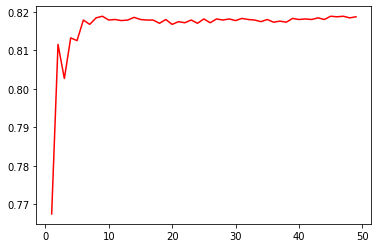

In [55]:
plt.plot(k,acc_score,c="Red")

In [56]:
max1=np.max(acc_score)
k_val=acc_score.index(max1)

In [57]:
knn=KNN(n_neighbors=k_val+1)
knn.fit(train_x,train_y)
knn_train_predict=knn.predict(train_x)
knn_train_score=accuracy_score(knn_train_predict,train_y)

In [58]:
knn_test_predict=knn.predict(test_x)
knn_test_score=accuracy_score(knn_test_predict,test_y)
knn_train_score,knn_test_score

(0.8340223621159447, 0.8189120631341601)

# KNN MODEL WITH K FOLD VALIDATION

In [59]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(KNN(n_neighbors=50),train_x,train_y,cv=10)
score.mean(),score.std()

(0.8163582835670671, 0.002105662767573113)

In [60]:
def Val_score(k):
    avg=[]
    for i in k:
        score=cross_val_score(KNN(n_neighbors=i),train_x,train_y,cv=10)
        avg.append(score.mean())
    return avg

In [61]:
k=list(range(1,50))
mean=Val_score(k)

Text(0.5, 1.0, 'Val Score')

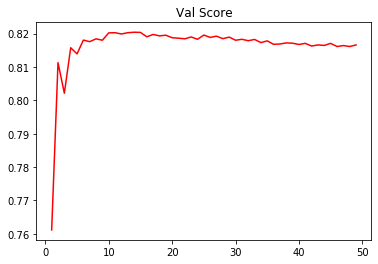

In [62]:
plt.plot(k,mean,c="Red")
plt.title("Val Score")

In [63]:
max2=np.max(mean)
K_val1=mean.index(max2)

In [64]:
score=cross_val_score(KNN(n_neighbors=K_val1+1),train_x,train_y,cv=10)
score.mean()

0.8203984671048217

In [65]:
knn=KNN(n_neighbors=K_val1+1)
knn.fit(train_x,train_y)
knn_train_predict=knn.predict(train_x)
knn_train_score=accuracy_score(knn_train_predict,train_y)
knn_test_predict=knn.predict(test_x)
knn_test_score=accuracy_score(knn_test_predict,test_y)
knn_train_score,knn_test_score

(0.8256130790190735, 0.818630214205186)

# LOGISTIC REGRESSION

In [66]:
from sklearn.linear_model import LogisticRegression as logreg

In [67]:
lreg=logreg(random_state=52)
lreg.fit(train_x,train_y)
lreg_train_predict=lreg.predict(train_x)
lreg_train_score=accuracy_score(lreg_train_predict,train_y)
lreg_test_predict=lreg.predict(test_x)
lreg_test_score=accuracy_score(lreg_test_predict,test_y)
lreg_train_score,lreg_test_score

(0.8347270506436155, 0.8320180383314544)

USING PREDICT_PROBA

In [68]:
lreg_proba_predict=lreg.predict_proba(test_x)[:,1]

In [69]:
for i in range(len(lreg_proba_predict)):
    if (lreg_proba_predict[i])>0.6:
        lreg_proba_predict[i]=1
    else:
        lreg_proba_predict[i]=0

In [70]:
accuracy_score(lreg_proba_predict,test_y)

0.8279312288613303

In [71]:
lreg_proba_predict=lreg.predict_proba(test_x)[:,1]

In [72]:
for i in range(len(lreg_proba_predict)):
    if (lreg_proba_predict[i])>0.7:
        lreg_proba_predict[i]=1
    else:
        lreg_proba_predict[i]=0

In [73]:
accuracy_score(lreg_proba_predict,test_y)

0.8258173618940248

In [74]:
lreg_proba_predict=lreg.predict_proba(test_x)[:,1]

In [75]:
for i in range(len(lreg_proba_predict)):
    if (lreg_proba_predict[i])>0.4:
        lreg_proba_predict[i]=1
    else:
        lreg_proba_predict[i]=0

In [76]:
accuracy_score(lreg_proba_predict,test_y)

0.8424464487034949

In [77]:
lreg_proba_predict=lreg.predict_proba(test_x)[:,1]

In [78]:
for i in range(len(lreg_proba_predict)):
    if (lreg_proba_predict[i])>0.28:
        lreg_proba_predict[i]=1
    else:
        lreg_proba_predict[i]=0

In [79]:
accuracy_score(lreg_proba_predict,test_y)

0.8490698985343855

# DECISION TREE

In [80]:
from sklearn.tree import DecisionTreeClassifier

In [81]:
dt_model=DecisionTreeClassifier(random_state=52)

In [82]:
dt_model.fit(train_x,train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=52, splitter='best')

In [83]:
train_predict=dt_model.predict(train_x)
accuracy_score(train_predict,train_y)

1.0

In [84]:
test_predict=dt_model.predict(test_x)
accuracy_score(test_predict,test_y)

0.7870631341600902

In [85]:
def gini_depth(k):
    test_scores=[]
    for i in k:
        dt_model=DecisionTreeClassifier(random_state=52,criterion="gini",max_depth=i)
        dt_model.fit(train_x,train_y)
        test_predict=dt_model.predict(test_x)
        test_scores.append(accuracy_score(test_predict,test_y))
    return test_scores

In [86]:
k=list(range(1,50))
test_performance=[]
test_performance=gini_depth(k)

In [87]:
max1=np.max(test_performance)
ind=test_performance.index(max1)

In [88]:
dt_model=DecisionTreeClassifier(random_state=52,criterion="gini",max_depth=ind+1)
dt_model.fit(train_x,train_y)
test_predict=dt_model.predict(test_x)
accuracy_score(test_predict,test_y)

0.85456595264938

In [89]:
def gini_maxfeatures(k):
    features=[]
    for i in k:
        dt_model=DecisionTreeClassifier(random_state=52,criterion="gini",max_depth=ind+1,max_features=i)
        dt_model.fit(train_x,train_y)
        test_predict=dt_model.predict(test_x)
        features.append(accuracy_score(test_predict,test_y))
    return features

In [90]:
k=list(range(1,x.shape[1]))
features=[]
features=gini_maxfeatures(k)

In [91]:
max2=np.max(features)
n_fea=features.index(max2)

In [92]:
dt_model=DecisionTreeClassifier(random_state=52,criterion="gini",max_depth=ind+1,max_features=n_fea+1)
dt_model.fit(train_x,train_y)
test_predict=dt_model.predict(test_x)
accuracy_score(test_predict,test_y)

0.8561161217587373

USING ENTROPY

In [93]:
dt_model=DecisionTreeClassifier(random_state=52,criterion="entropy")

In [94]:
dt_model.fit(train_x,train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=52, splitter='best')

In [95]:
train_predict=dt_model.predict(train_x)
accuracy_score(train_predict,train_y)

1.0

In [96]:
test_predict=dt_model.predict(test_x)
accuracy_score(test_predict,test_y)

0.7977733934611049

In [97]:
def entropy_depth(k):
    test_scores=[]
    for i in k:
        dt_model=DecisionTreeClassifier(random_state=52,criterion="entropy",max_depth=i)
        dt_model.fit(train_x,train_y)
        test_predict=dt_model.predict(test_x)
        test_scores.append(accuracy_score(test_predict,test_y))
    return test_scores

In [98]:
k=list(range(1,50))
test_performance=[]
test_performance=entropy_depth(k)

In [99]:
max1=np.max(test_performance)
ind=test_performance.index(max1)

In [100]:
dt_model=DecisionTreeClassifier(random_state=52,criterion="entropy",max_depth=ind+1)
dt_model.fit(train_x,train_y)
test_predict=dt_model.predict(test_x)
accuracy_score(test_predict,test_y)

0.8562570462232244

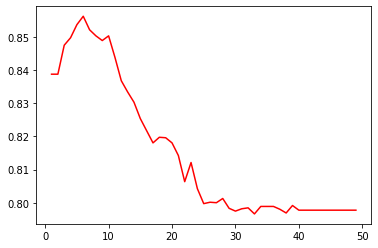

In [101]:
plt.plot(k,test_performance,c="Red")

In [102]:
def entropy_maxfeatures(k):
    features=[]
    for i in k:
        dt_model=DecisionTreeClassifier(random_state=52,criterion="entropy",max_depth=ind+1,max_features=i)
        dt_model.fit(train_x,train_y)
        test_predict=dt_model.predict(test_x)
        features.append(accuracy_score(test_predict,test_y))
    return features

In [103]:
k=list(range(1,x.shape[1]))
features=[]
features=entropy_maxfeatures(k)

max2=np.max(features)
n_fea=features.index(max2)

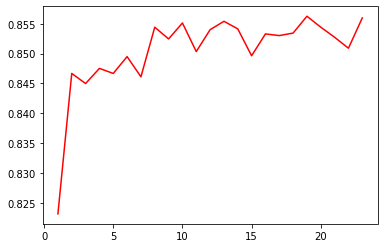

In [104]:
plt.plot(k,features,c="Red")

In [105]:
dt_model=DecisionTreeClassifier(random_state=52,criterion="entropy",max_depth=ind+1,max_features=n_fea+1)
dt_model.fit(train_x,train_y)
test_predict=dt_model.predict(test_x)
accuracy_score(test_predict,test_y)

0.8562570462232244

# BASIC ENSEMBLING MODEL

         Accuracy of :
             1)KNN                               ......         0.8189
             2)KNN WITH CROSS VALIDATION         ......         0.8186
             3)LOGISTIC REGRESSION               ......         0.8490
             4)DECISION TREE                     ......         0.8562

In [106]:
knn_score=0.8189
knn_fold_score=0.8186
log_score=0.8490
dt_score=0.8562

In [107]:
index_=[1,2,3,4]
test_scores=[knn_score,knn_fold_score,log_score,dt_score]

In [108]:
rank_eval=pd.DataFrame({"Score":test_scores},index=index_)
rank_eval

,Score
1,0.8189
2,0.8186
3,0.8490
4,0.8562


In [109]:
sorted_rank=rank_eval.sort_values("Score")
sorted_rank

,Score
2,0.8186
1,0.8189
3,0.8490
4,0.8562


In [110]:
sorted_rank["rank"]=[i for i in range(1,5)]
sorted_rank

,Score,rank
2,0.8186,1
1,0.8189,2
3,0.8490,3
4,0.8562,4


In [111]:
sorted_rank["weight"]=sorted_rank["rank"]/sorted_rank["rank"].sum()
sorted_rank

,Score,rank,weight
2,0.8186,1,0.1
1,0.8189,2,0.2
3,0.8490,3,0.3
4,0.8562,4,0.4


In [112]:
knn=KNN(n_neighbors=k_val+1)
knn.fit(train_x,train_y)
knn_predict=knn.predict(test_x)

In [113]:
knn=KNN(n_neighbors=K_val1+1)
knn.fit(train_x,train_y)
knn_fold_predict=knn.predict(test_x)

In [114]:
lreg_proba_predict

array([0., 0., 0., ..., 1., 1., 1.])

In [115]:
dt_model=DecisionTreeClassifier(random_state=52,criterion="entropy",max_depth=ind+1,max_features=n_fea+1)
dt_model.fit(train_x,train_y)
test_predict=dt_model.predict(test_x)

In [116]:
wt_pred1=knn_predict*float(sorted_rank.loc[[1],["weight"]].values)
wt_pred2=knn_fold_predict*float(sorted_rank.loc[[2],["weight"]].values)
wt_pred3=lreg_proba_predict*float(sorted_rank.loc[[3],["weight"]].values)
wt_pred4=test_predict*float(sorted_rank.loc[[4],["weight"]].values)
ranked_prediction=wt_pred1+wt_pred2+wt_pred3+wt_pred4
ranked_prediction

array([0. , 0. , 0. , ..., 0.3, 0.3, 0.3])

In [117]:
for i in range(len(ranked_prediction)):
    if (ranked_prediction[i])>0.4:
        ranked_prediction[i]=1
    else:
        ranked_prediction[i]=0
accuracy_score(ranked_prediction,test_y)

0.8518883878241262

In [118]:
wt_pred1=knn_predict*float(sorted_rank.loc[[1],["weight"]].values)
wt_pred2=knn_fold_predict*float(sorted_rank.loc[[2],["weight"]].values)
wt_pred3=lreg_proba_predict*float(sorted_rank.loc[[3],["weight"]].values)
wt_pred4=test_predict*float(sorted_rank.loc[[4],["weight"]].values)
ranked_prediction=wt_pred1+wt_pred2+wt_pred3+wt_pred4
ranked_prediction

array([0. , 0. , 0. , ..., 0.3, 0.3, 0.3])

In [119]:
for i in range(len(ranked_prediction)):
    if (ranked_prediction[i])>0.39:
        ranked_prediction[i]=1
    else:
        ranked_prediction[i]=0
accuracy_score(ranked_prediction,test_y)

0.8563979706877114

# RANDOM FOREST

In [120]:
from sklearn.ensemble import RandomForestClassifier

In [121]:
rf=RandomForestClassifier(random_state=52,max_depth=35)
rf.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=35, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=52, verbose=0,
                       warm_start=False)

In [122]:
new_predict=rf.predict(test_x)
accuracy_score(new_predict,test_y)

0.8638669673055243

In [123]:
def rf_depth(k):
    rf_test_scores=[]
    for i in k:
        rf=RandomForestClassifier(random_state=52,max_depth=i)
        rf.fit(train_x,train_y)
        rf_test_predict=rf.predict(test_x)
        rf_test_scores.append(accuracy_score(rf_test_predict,test_y))
    return rf_test_scores

In [124]:
k=list(range(1,50))
rf_test_performance=[]
rf_test_performance=rf_depth(k)

In [125]:
rf_max=np.max(rf_test_performance)
rf_ind=rf_test_performance.index(rf_max)

In [126]:
rf=RandomForestClassifier(random_state=52,max_depth=rf_ind+1)
rf.fit(train_x,train_y)
predict=rf.predict(test_x)
accuracy_score(predict,test_y)

0.8651352874859075

In [127]:
rf=RandomForestClassifier(random_state=52,max_depth=rf_ind+1,n_estimators=10)
rf.fit(train_x,train_y)
predict=rf.predict(test_x)
accuracy_score(predict,test_y)

0.8516065388951521

In [128]:
def rf_estimators(k):
    rf_test_scores=[]
    for i in k:
        rf=RandomForestClassifier(random_state=52,max_depth=rf_ind+1,n_estimators=i)
        rf.fit(train_x,train_y)
        rf_test_predict=rf.predict(test_x)
        rf_test_scores.append(accuracy_score(rf_test_predict,test_y))
    return rf_test_scores

In [129]:
k=list(range(1,300))
rf_test_performance=[]
rf_test_performance=rf_estimators(k)

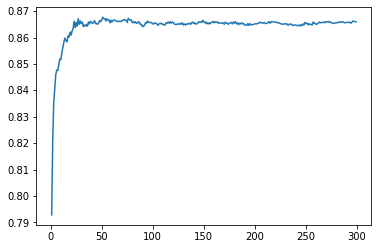

In [130]:
plt.plot(k,rf_test_performance)

In [131]:
rf_fea=np.max(rf_test_performance)
rf_fea_ind=rf_test_performance.index(rf_fea)

In [132]:
rf=RandomForestClassifier(random_state=52,max_depth=rf_ind+1,n_estimators=rf_fea_ind+1)
rf.fit(train_x,train_y)
predict=rf.predict(test_x)
accuracy_score(predict,test_y)

0.8676719278466741

In [133]:
def rf_features(k):
    rf_test_scores=[]
    for i in k:
        rf=RandomForestClassifier(random_state=52,max_depth=rf_ind+1,n_estimators=rf_fea_ind+1,max_features=i)
        rf.fit(train_x,train_y)
        rf_test_predict=rf.predict(test_x)
        rf_test_scores.append(accuracy_score(rf_test_predict,test_y))
    return rf_test_scores

In [134]:
k=list(range(1,x.shape[1]+1))
rf_test_performance=[]
rf_test_performance=rf_features(k)

In [135]:
rf_fea1=np.max(rf_test_performance)
rf_fea1_ind=rf_test_performance.index(rf_fea1)

In [136]:
rf=RandomForestClassifier(random_state=52,max_depth=rf_ind+1,n_estimators=rf_fea_ind+1,max_features=rf_fea1_ind+1)
rf.fit(train_x,train_y)
test_predict=rf.predict(test_x)
accuracy_score(test_predict,test_y)

0.8676719278466741

In [137]:
def rf_min_samples_split(k):
    test_predict=[]
    for i in k:
        rf=RandomForestClassifier(random_state=52,max_depth=rf_ind+1,n_estimators=rf_fea_ind+1,max_features=rf_fea1_ind+1,min_samples_split=i)
        rf.fit(train_x,train_y)
        predict=rf.predict(test_x)
        test_predict.append(accuracy_score(predict,test_y))
    return test_predict

In [138]:
k=list(range(2,200,2))
test_split_predict=rf_min_samples_split(k)

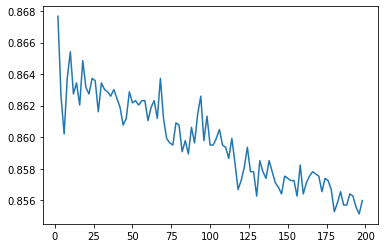

In [139]:
plt.plot(k,test_split_predict)

In [140]:
max_split=np.max(test_split_predict)
rf_spl=test_split_predict.index(max_split)

In [141]:
rf=RandomForestClassifier(random_state=52,max_depth=rf_ind+1,n_estimators=rf_fea_ind+1,max_features=rf_fea1_ind+1,min_samples_split=(rf_spl*2)+2)
rf.fit(train_x,train_y)
test_predict=rf.predict(test_x)
accuracy_score(test_predict,test_y)

0.8676719278466741

In [142]:
def rf_min_samples_leaf(k):
    test_predict=[]
    for i in k:
        rf=RandomForestClassifier(random_state=52,max_depth=rf_ind+1,n_estimators=rf_fea_ind+1,max_features=rf_fea1_ind+1,min_samples_split=(rf_spl*2)+2,min_samples_leaf=i)
        rf.fit(train_x,train_y)
        predict=rf.predict(test_x)
        test_predict.append(accuracy_score(predict,test_y))
    return test_predict

In [143]:
k=list(range(1,200,2))
test_leaf_predict=rf_min_samples_leaf(k)

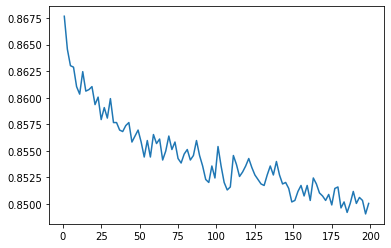

In [144]:
plt.plot(k,test_leaf_predict)

In [145]:
max_leaf=np.max(test_split_predict)
rf_leaf=test_leaf_predict.index(max_leaf)

In [146]:
rf=RandomForestClassifier(random_state=52,max_depth=rf_ind+1,n_estimators=rf_fea_ind+1,max_features=rf_fea1_ind+1,min_samples_split=(rf_spl*2)+2,min_samples_leaf=(rf_leaf*2)+1)
rf.fit(train_x,train_y)
test_predict=rf.predict(test_x)
accuracy_score(test_predict,test_y)

0.8676719278466741

RANDOM FOREST IS DONE FOR ENTROPY CRITERION TOO,WHERE THE ACCURACY IS 0.8672 AND ONLY THE BEST MODELS ARE CONSIDERED IN THIS PROJECT OF EACH MODELS.

        Accuracy :
            1)KNN                        ......        0.8189         
            2)KNK FOLD                   ......        0.8186
            3)LOGISTIC REGRESSION        ......        0.8490
            4)DECISION TREE              ......        0.8562
            5)BASIC ENSEMBLING MODEL     ......        0.8564
            6)RANDOM FOREST              ......        0.8676

BASED ON THE ABOVE ACCURACY OF EACH MODELS PLOTTING THE COMPARISION GRAPH LOOKS LIKE .......

In [147]:
#plotting barplots for accuracy models
k=81.89
l=81.86
m=84.90
n=85.62
o=85.64
p=86.76

In [151]:
df1=pd.DataFrame([k,l,m,n,o,p,],columns=["Scores",])

Text(0.5, 1.0, 'Churn Prediction accuracies of different models')

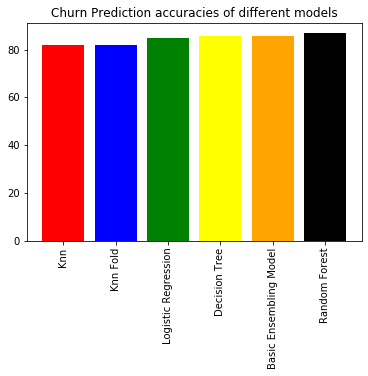

In [152]:
labels=["Knn","Knn Fold","Logistic Regression","Decision Tree","Basic Ensembling Model","Random Forest",]
labels_pos=[i for i, _ in enumerate(labels)]
plt.bar(labels_pos,df1["Scores"],color=["Red","Blue","Green","Yellow","Orange","Black",])
plt.xticks(labels_pos,labels,rotation=90)
plt.title("Churn Prediction accuracies of different models")